In [1]:
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import itertools

import keras
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.models import Sequential
import itertools
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import layers
from keras.layers import Dense, Dropout, BatchNormalization
from keras.utils.vis_utils import plot_model


from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']


Using TensorFlow backend.
/Users/akshayrajeev/opt/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/akshayrajeev/opt/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/akshayrajeev/opt/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/U

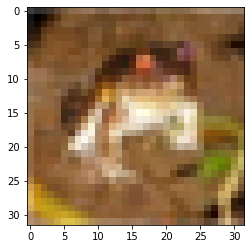

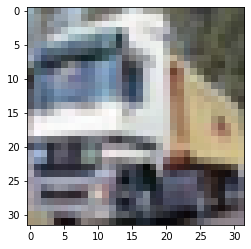

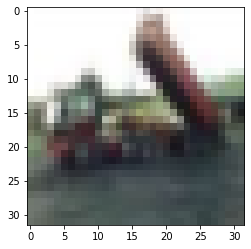

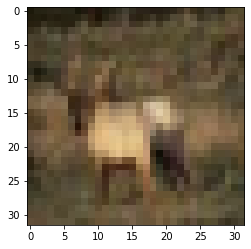

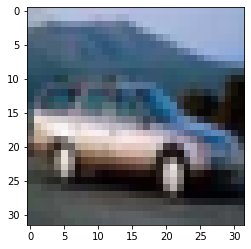

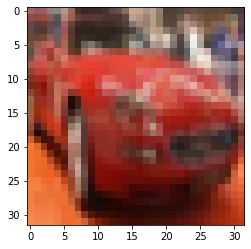

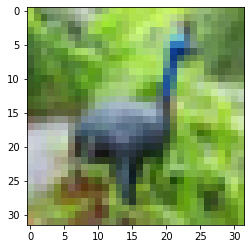

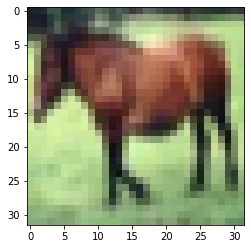

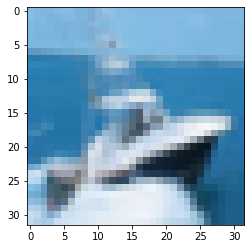

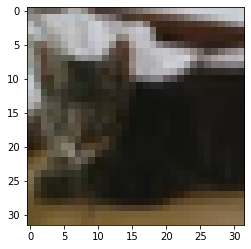

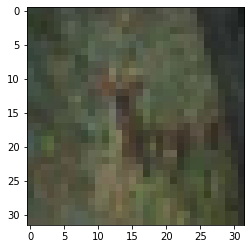

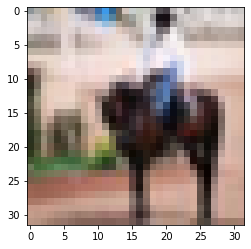

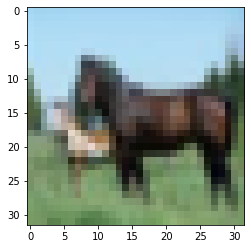

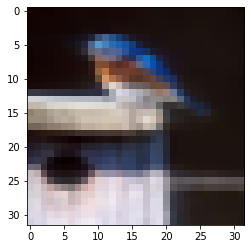

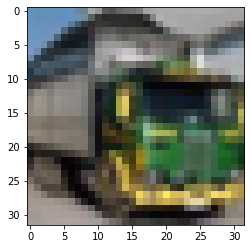

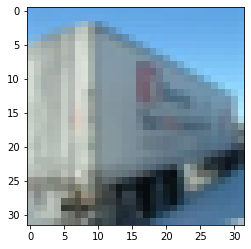

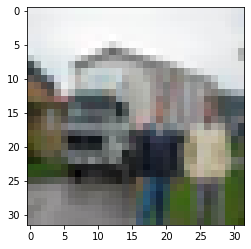

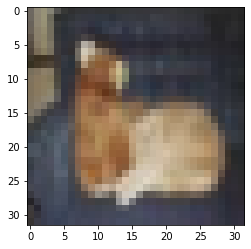

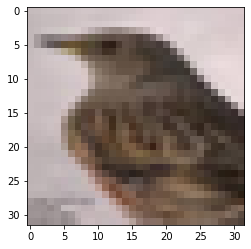

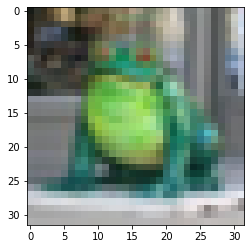

In [2]:
for i in range(0,20):
    implot = plt.imshow(x_train[i])
    plt.show()

In [3]:
idx1 = []
for i in range(len(y_train)):
    if(y_train[i] == 0 or y_train[i] == 1 or y_train[i] == 2):
        idx1.append(i)
x_train = x_train[idx1]
y_train = y_train[idx1]

idx2 = []
for i in range(len(y_test)):
    if(y_test[i] == 0 or y_test[i] == 1 or y_test[i] == 2):
        idx2.append(i)
x_test = x_test[idx2]
y_test = y_test[idx2]


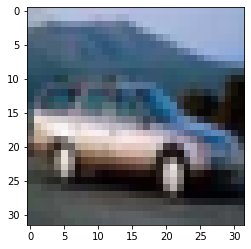

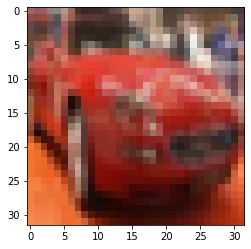

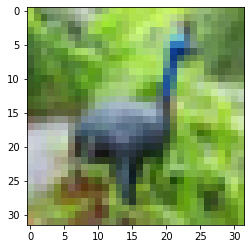

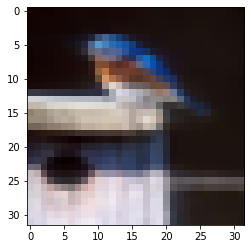

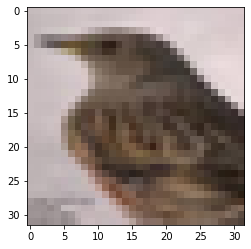

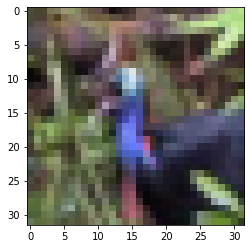

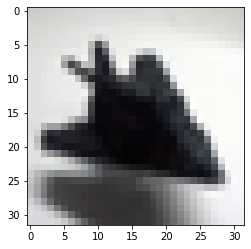

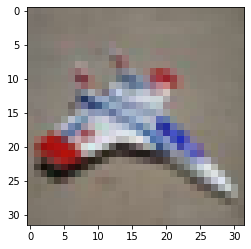

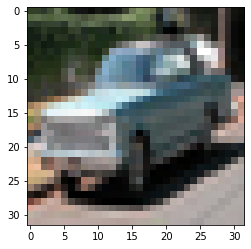

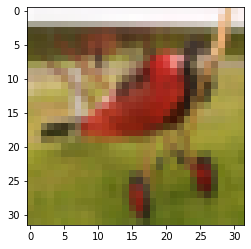

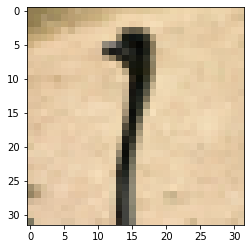

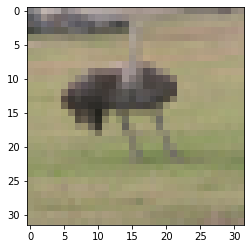

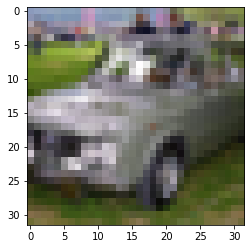

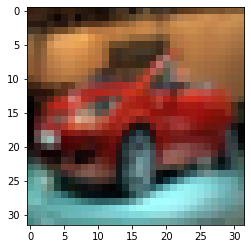

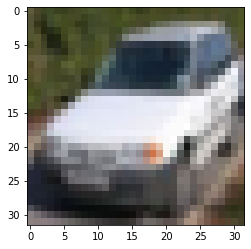

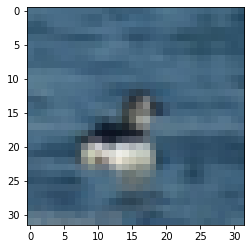

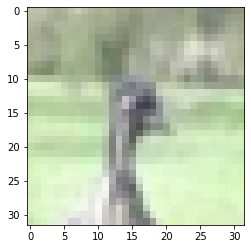

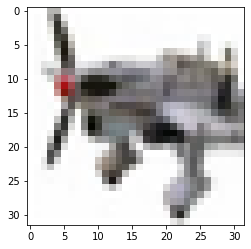

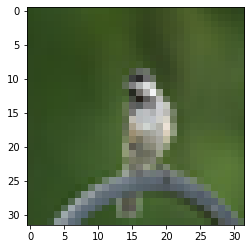

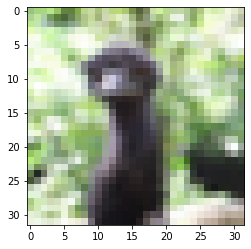

In [4]:
for i in range(0,20):
    implot = plt.imshow(x_train[i])
    plt.show()

In [5]:
x_train = np.reshape(x_train,(15000,3072))
print(x_train.shape)
x_test = np.reshape(x_test,(3000,3072))

#normalizing
x_train_mean = np.mean(x_train)
x_train_std  = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean) / x_train_std
x_test  = (x_test - x_test_mean) / x_test_std 

print(np.unique(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 1201)

(15000, 3072)
[0 1 2]


In [6]:
print(x_train)

[[-0.98042365 -1.11795982 -1.27077779 ...  0.71585582  0.41021988
   0.3032473 ]
 [ 1.3271277   1.49522747  1.77029982 ...  1.93839958  1.96896318
   1.95368138]
 [-0.36915176 -0.1704884  -0.65950591 ...  0.24212012  0.28796551
   0.01289316]
 ...
 [ 0.94508278 -0.15520661 -1.27077779 ...  0.88395559  0.21155652
  -0.35386997]
 [ 0.8228284  -0.35386997 -0.75119669 ...  0.3185291   0.11986574
   0.42550168]
 [ 1.93839958  1.20487333 -1.92789506 ...  1.95368138  1.22015512
  -1.92789506]]


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               786688    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

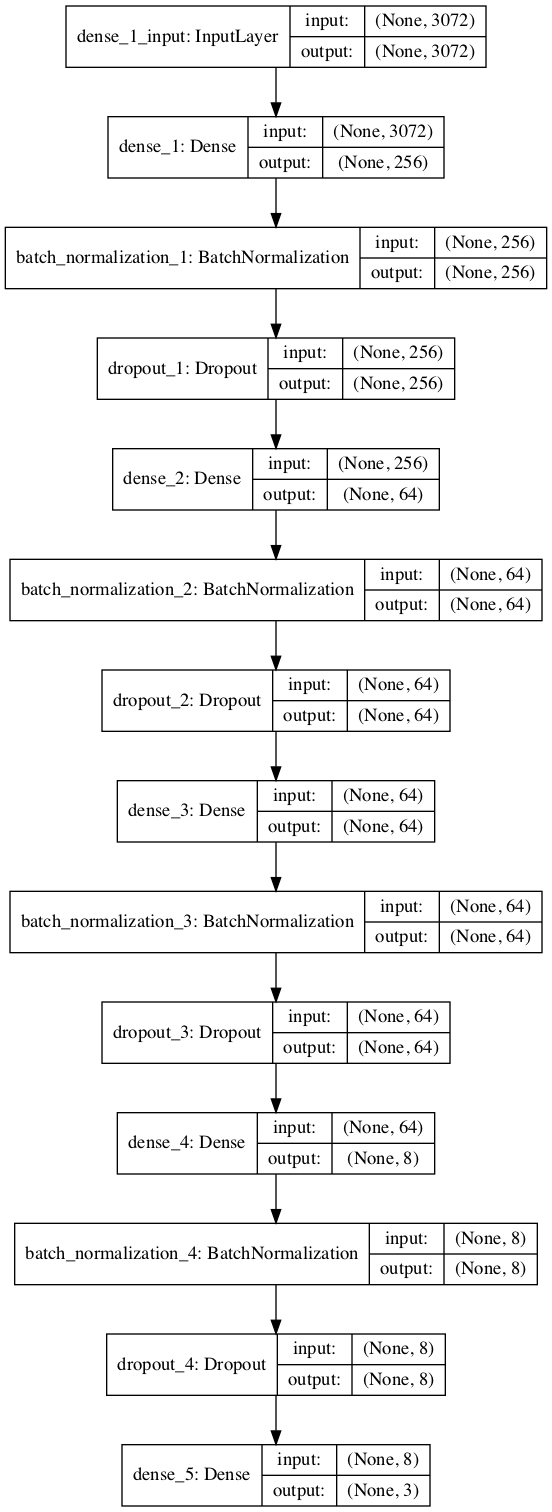

In [7]:
model = Sequential()
model.add(Dense(256,input_dim = 3072, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer = RMSprop(),
              metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="weights.finalmodel", verbose=0, save_best_only=True)
callbacks_list = [checkpointer]

In [9]:
history = model.fit(x_train, y_train,
          epochs=35,
          batch_size = 100,
          validation_data = (x_validate, y_validate),
          callbacks=callbacks_list,
          verbose = 1)

Train on 12000 samples, validate on 3000 samples
Epoch 1/35
12000/12000 [==============================] - 7s 549us/step - loss: 1.0724 - accuracy: 0.4645 - val_loss: 0.8139 - val_accuracy: 0.6960
Epoch 2/35
12000/12000 [==============================] - 3s 233us/step - loss: 0.9072 - accuracy: 0.5884 - val_loss: 0.7131 - val_accuracy: 0.7270
Epoch 3/35
12000/12000 [==============================] - 3s 267us/step - loss: 0.8314 - accuracy: 0.6479 - val_loss: 0.6618 - val_accuracy: 0.7373
Epoch 4/35
12000/12000 [==============================] - 3s 278us/step - loss: 0.7880 - accuracy: 0.6824 - val_loss: 0.6412 - val_accuracy: 0.7497
Epoch 5/35
12000/12000 [==============================] - 3s 280us/step - loss: 0.7557 - accuracy: 0.6975 - val_loss: 0.6135 - val_accuracy: 0.7593
Epoch 6/35
12000/12000 [==============================] - 3s 279us/step - loss: 0.7257 - accuracy: 0.7127 - val_loss: 0.6166 - val_accuracy: 0.7613
Epoch 7/35
12000/12000 [==============================] - 3s 28

In [10]:
score = model.evaluate(x_test, y_test)

loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = model.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
model.save("model_optimizer_RMSprop.model")

3000/3000 [==============================] - 0s 133us/step
Validation: accuracy = 0.813333  ;  loss_v = 0.496666
Test: accuracy = 0.815333  ;  loss = 0.478705


Results using Dropout and batch normalization:


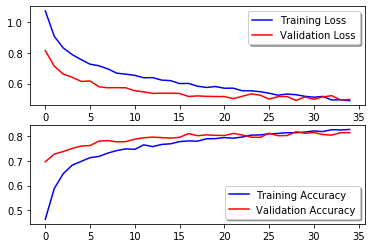

In [11]:
fig, axs = plt.subplots(2,1)

axs[0].plot(history.history['loss'], color = 'b', label = "Training Loss")
axs[0].plot(history.history['val_loss'], color = 'r', label = "Validation Loss", axes = axs[0])
legend = axs[0].legend(loc='best', shadow = True)

axs[1].plot(history.history['accuracy'], color = 'b', label = "Training Accuracy")
axs[1].plot(history.history['val_accuracy'], color = 'r', label = "Validation Accuracy")
legend = axs[1].legend(loc='best', shadow = True)
print('Results using Dropout and batch normalization:')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 27        
Total params: 807,843
Trainable params: 807,843
Non-trainable params: 0
_________________________________________________________________


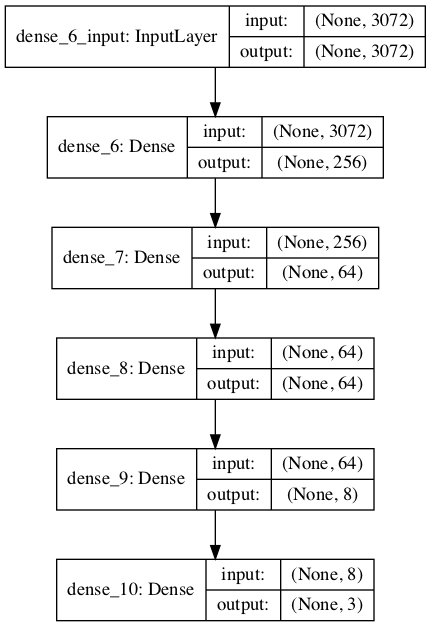

In [12]:
model2 = Sequential()
model2.add(Dense(256,input_dim = 3072, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
model2.add(Dense(64, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
model2.add(Dense(64, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
model2.add(Dense(8, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
model2.add(Dense(3, activation='softmax'))
model2.summary()
plot_model(model2, show_shapes=True, show_layer_names=True)

In [13]:
model2.compile(loss='categorical_crossentropy',
              optimizer= RMSprop(),
              metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="weights2.finalmodel", verbose=0, save_best_only=True)
callbacks_list = [checkpointer]

history2 = model2.fit(x_train, y_train,
          epochs=35,
          batch_size = 100,
          validation_data = (x_validate, y_validate),
          callbacks=callbacks_list,
          verbose = 1)

Train on 12000 samples, validate on 3000 samples
Epoch 1/35
12000/12000 [==============================] - 2s 185us/step - loss: 0.8277 - accuracy: 0.6619 - val_loss: 0.7132 - val_accuracy: 0.7077
Epoch 2/35
12000/12000 [==============================] - 1s 120us/step - loss: 0.6476 - accuracy: 0.7435 - val_loss: 0.7238 - val_accuracy: 0.7107
Epoch 3/35
12000/12000 [==============================] - 2s 131us/step - loss: 0.5770 - accuracy: 0.7779 - val_loss: 0.6362 - val_accuracy: 0.7540
Epoch 4/35
12000/12000 [==============================] - 2s 132us/step - loss: 0.5112 - accuracy: 0.8006 - val_loss: 0.6200 - val_accuracy: 0.7630
Epoch 5/35
12000/12000 [==============================] - 2s 134us/step - loss: 0.4619 - accuracy: 0.8230 - val_loss: 0.6263 - val_accuracy: 0.7617
Epoch 6/35
12000/12000 [==============================] - 2s 138us/step - loss: 0.4186 - accuracy: 0.8381 - val_loss: 0.5632 - val_accuracy: 0.7993
Epoch 7/35
12000/12000 [==============================] - 2s 13

In [14]:
score2 = model2.evaluate(x_test, y_test)

loss2, accuracy2 = model2.evaluate(x_test, y_test, verbose=1)
loss_v2, accuracy_v2 = model2.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v2, loss_v2))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy2, loss2))
model.save("model2_optimizer_RMSprop.model")

3000/3000 [==============================] - 0s 82us/step
Validation: accuracy = 0.784667  ;  loss_v = 1.457129
Test: accuracy = 0.789000  ;  loss = 1.265321


Results without using any techniques:


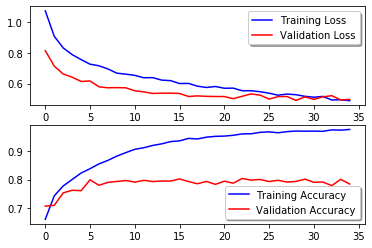

In [15]:
fig, axs = plt.subplots(2,1)

axs[0].plot(history.history['loss'], color = 'b', label = "Training Loss")
axs[0].plot(history.history['val_loss'], color = 'r', label = "Validation Loss", axes = axs[0])
legend = axs[0].legend(loc='best', shadow = True)

axs[1].plot(history2.history['accuracy'], color = 'b', label = "Training Accuracy")
axs[1].plot(history2.history['val_accuracy'], color = 'r', label = "Validation Accuracy")
legend = axs[1].legend(loc='best', shadow = True)
print('Results without using any techniques:')